# Car Prediction Price

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.neighbors import KNeighborsRegressor
from statsmodels.tsa.arima.model import ARIMA


In [2]:
# Read Data file CSV
df = pd.read_csv("dataset/price-cars.csv")

### Cleaning Data

In [3]:
# Cleaning data missing value
df_cleanup = df.dropna(subset=['Market Category'])
df_cleanup.to_csv('dataset/car_price_cleaned.csv', index=False)
df_cleanup.columns = df_cleanup.columns.str.lower().str.replace(' ','_')
df_cleanup.rename(columns={'msrp': 'price'}, inplace=True)
df_cleanup['engine_fuel_type']=df_cleanup['engine_fuel_type'].fillna('regular unleaded')
df_cleanup['engine_hp']=df_cleanup['engine_hp'].fillna(df_cleanup['engine_hp'].mean().round())
df_cleanup['engine_cylinders']=df_cleanup['engine_cylinders'].fillna(df_cleanup['engine_cylinders'].mean().round())
df_cleanup['number_of_doors']=df_cleanup['number_of_doors'].fillna(4)
df_cleanup=df_cleanup.drop('market_category',axis=1).reset_index(drop=True)
df_cleanup=df_cleanup.drop('model',axis=1).reset_index(drop=True)

print(df_cleanup.columns)
print(df_cleanup.info())
print(df_cleanup.isnull().sum())

Index(['make', 'year', 'engine_fuel_type', 'engine_hp', 'engine_cylinders',
       'transmission_type', 'driven_wheels', 'number_of_doors', 'vehicle_size',
       'vehicle_style', 'highway_mpg', 'city_mpg', 'popularity', 'price'],
      dtype='object')
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8172 entries, 0 to 8171
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   make               8172 non-null   object 
 1   year               8172 non-null   int64  
 2   engine_fuel_type   8172 non-null   object 
 3   engine_hp          8172 non-null   float64
 4   engine_cylinders   8172 non-null   float64
 5   transmission_type  8172 non-null   object 
 6   driven_wheels      8172 non-null   object 
 7   number_of_doors    8172 non-null   float64
 8   vehicle_size       8172 non-null   object 
 9   vehicle_style      8172 non-null   object 
 10  highway_mpg        8172 non-null   int64  
 11  city_mpg   

C:\Users\mukhl\AppData\Local\Temp\ipykernel_5328\3817518679.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleanup.rename(columns={'msrp': 'price'}, inplace=True)
C:\Users\mukhl\AppData\Local\Temp\ipykernel_5328\3817518679.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleanup['engine_fuel_type']=df_cleanup['engine_fuel_type'].fillna('regular unleaded')
C:\Users\mukhl\AppData\Local\Temp\ipykernel_5328\3817518679.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer]

### Exploratory Data

In [4]:
pd.options.display.float_format = '{:.2f}'.format
df_cleanup.describe()

,year,engine_hp,engine_cylinders,number_of_doors,highway_mpg,city_mpg,popularity,price
count,8172.00,8172.00,8172.00,8172.00,8172.00,8172.00,8172.00,8172.00
mean,2012.08,274.41,5.75,3.42,27.07,20.08,1499.06,50042.85
std,6.30,114.60,1.92,0.90,9.51,10.02,1413.50,70012.84
min,1990.00,55.00,0.00,2.00,12.00,7.00,2.00,2000.00
25%,2010.00,193.00,4.00,2.00,22.00,16.00,549.00,25985.00
50%,2015.00,265.00,6.00,4.00,26.00,18.00,1013.00,35010.00
75%,2016.00,320.00,6.00,4.00,30.00,22.00,2009.00,48817.50
max,2017.00,1001.00,16.00,4.00,354.00,137.00,5657.00,2065902.00


In [5]:
car_make = df_cleanup.groupby('make').size()
print(car_make)

# Select Specific Data
bmw_data = df_cleanup[df_cleanup['make'] == 'BMW']
print(bmw_data.describe())

make
Acura            252
Alfa Romeo         5
Aston Martin      93
Audi             328
BMW              334
Bentley           74
Bugatti            3
Buick            125
Cadillac         397
Chevrolet        622
Chrysler         108
Dodge            320
FIAT              41
Ferrari           69
Ford             499
GMC              270
Genesis            3
HUMMER            17
Honda            284
Hyundai          214
Infiniti         330
Kia              109
Lamborghini       52
Land Rover       143
Lexus            202
Lincoln          164
Lotus             29
Maserati          58
Maybach           16
Mazda            259
McLaren            5
Mercedes-Benz    353
Mitsubishi       128
Nissan           318
Oldsmobile         3
Plymouth          39
Pontiac           77
Porsche          136
Rolls-Royce       31
Saab             111
Scion             48
Spyker             3
Subaru           214
Suzuki            99
Tesla             18
Toyota           303
Volkswagen       585
Volvo   

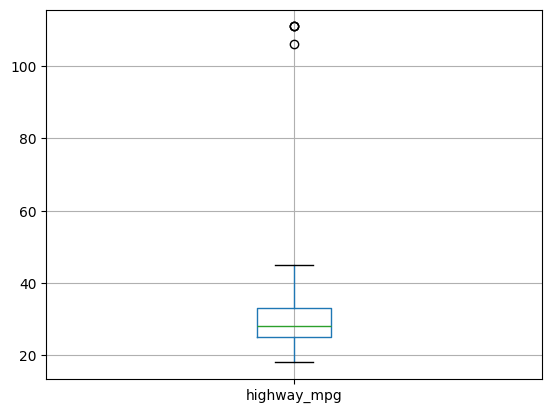

In [6]:
bmw_data.boxplot(column=['highway_mpg'])
plt.show()

### Handling Outliers

Hasil Filter IQR      make  year             engine_fuel_type  engine_hp  engine_cylinders  \
0     BMW  2011  premium unleaded (required)     335.00              6.00   
1     BMW  2011  premium unleaded (required)     300.00              6.00   
2     BMW  2011  premium unleaded (required)     300.00              6.00   
3     BMW  2011  premium unleaded (required)     230.00              6.00   
4     BMW  2011  premium unleaded (required)     230.00              6.00   
...   ...   ...                          ...        ...               ...   
8159  BMW  2016  premium unleaded (required)     240.00              4.00   
8160  BMW  2016  premium unleaded (required)     335.00              6.00   
8161  BMW  2001  premium unleaded (required)     394.00              8.00   
8162  BMW  2002  premium unleaded (required)     394.00              8.00   
8163  BMW  2003  premium unleaded (required)     394.00              8.00   

     transmission_type     driven_wheels  number_of_doors 

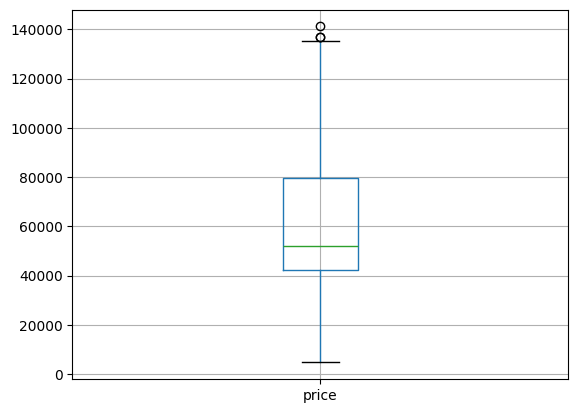

In [77]:
# Handling Outliers Price
# Menghapus outliers dengan filter IQR
Q1 = bmw_data['price'].quantile(0.25)
Q3 = bmw_data['price'].quantile(0.75)
IQR = Q3 - Q1

# Mengidentifikasi outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Menghapus outliers dari dataset
df_iqr = bmw_data[(bmw_data['price'] >= lower_bound) & (bmw_data['price'] <= upper_bound)]

print(f'Hasil Filter IQR {df_iqr}')
# print(df)
print(bmw_data['price'])

bmw_data.boxplot(column=['price'])
plt.show()

In [17]:
# Menentukan fitur (X) dan target (y)
X = df_cleanup.drop('price', axis=1)  # Semua kolom kecuali 'price'
y = df_cleanup['price']  # Kolom 'price' sebagai target

In [18]:
# Melakukan One-Hot Encoding pada kolom kategorikal
X = pd.get_dummies(X, drop_first=True)
print(X)

      year  engine_hp  engine_cylinders  number_of_doors  highway_mpg  \
0     2011     335.00              6.00             2.00           26   
1     2011     300.00              6.00             2.00           28   
2     2011     300.00              6.00             2.00           28   
3     2011     230.00              6.00             2.00           28   
4     2011     230.00              6.00             2.00           28   
...    ...        ...               ...              ...          ...   
8167  2012     300.00              6.00             4.00           23   
8168  2012     300.00              6.00             4.00           23   
8169  2012     300.00              6.00             4.00           23   
8170  2013     300.00              6.00             4.00           23   
8171  2006     221.00              6.00             4.00           26   

      city_mpg  popularity  make_Alfa Romeo  make_Aston Martin  make_Audi  \
0           19        3916            False   

In [19]:
# Membagi data dengan rasio 70% untuk pelatihan dan 30% untuk pengujian
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Membuat dan melatih model
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [20]:
# Melakukan prediksi pada data pengujian
y_pred = model.predict(X_test)

# Menghitung Mean Squared Error sebagai contoh evaluasi
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")

Mean Squared Error: 925676056.0325345


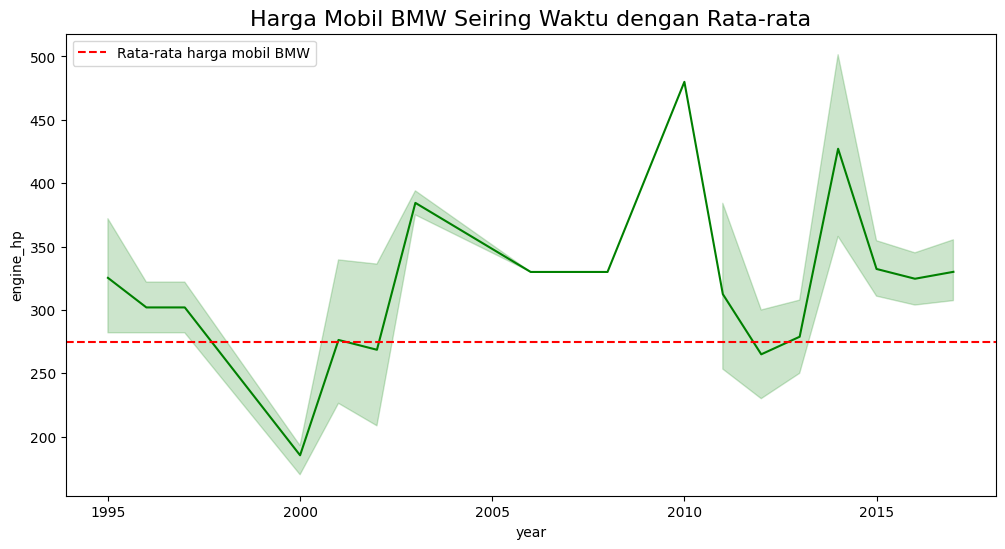

In [109]:
# Menambahkan anotasi ke plot
plt.figure(figsize=(12, 6))
sns.lineplot(x='year', y='engine_hp', data=bmw_data, color='green')

# Menambahkan anotasi
plt.axhline(y=df_cleanup['engine_hp'].mean(), color='red', linestyle='--', label='Rata-rata harga mobil BMW')
plt.text(df_cleanup['year'].iloc[300], df_cleanup['engine_hp'].mean()+1, s='', color='red')

plt.title('Harga Mobil BMW Seiring Waktu dengan Rata-rata', fontsize=16)
plt.legend()
plt.show()

#### Prepare Data

In [7]:
# Fitur dan target
X = df_cleanup.drop(columns=['price'])  # Drop kolom harga sebagai target
y = df_cleanup['price']

# One-hot encoding untuk fitur kategorikal
X = pd.get_dummies(X, drop_first=True)

# Pisahkan data menjadi training dan testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalisasi data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

### Initiate Model Linear Regression

In [8]:
# Latih model Linear Regression
model = LinearRegression()
model.fit(X_train_scaled, y_train)

# Prediksi harga menggunakan data test
predictions = model.predict(X_test_scaled)

# Evaluasi model
mse = mean_squared_error(y_test, predictions)
r2 = r2_score(y_test, predictions)

print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')

Mean Squared Error: 372370070.9620566
R-squared: 0.8339696287114013


### Visualize

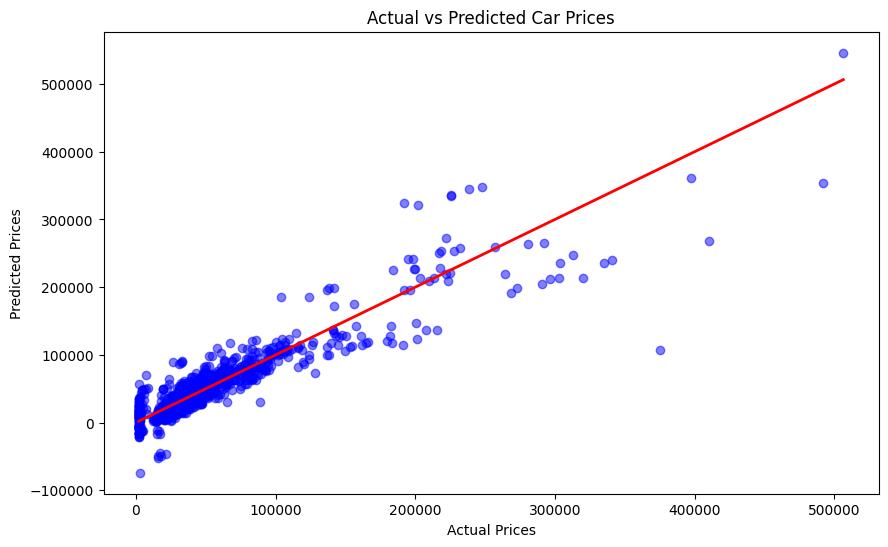

In [9]:
# Visualisasikan hasil prediksi vs nilai asli
plt.figure(figsize=(10, 6))
plt.scatter(y_test, predictions, color='blue', alpha=0.5)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', lw=2)
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Actual vs Predicted Car Prices')
plt.show()


### Predict Price 5 years

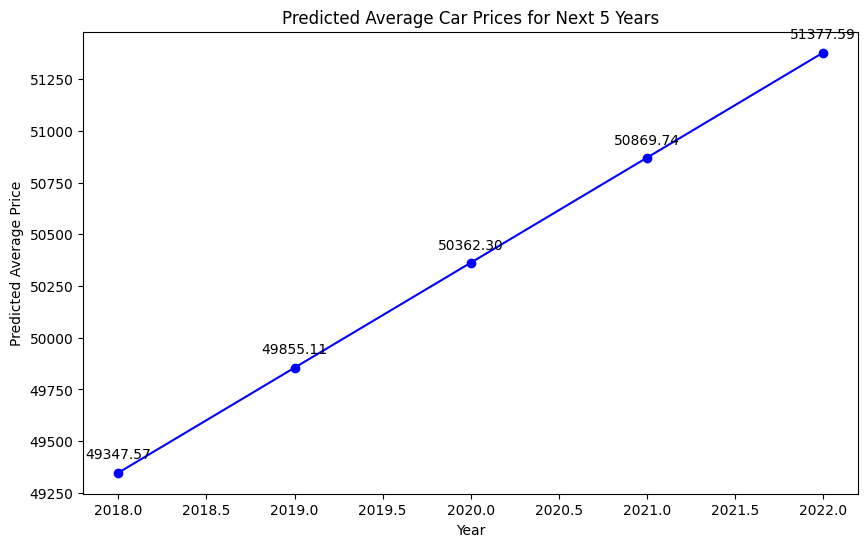

In [10]:
# Copy salah satu subset data dari X_test untuk dijadikan template prediksi
future_data = X_test.copy()

# Buat array untuk menampung prediksi masa depan
future_predictions = []

# Loop untuk memprediksi harga setiap tahun selama 5 tahun ke depan
for year in range(1, 6):
    future_data['year'] = df_cleanup['year'].max() + year  # Tambahkan 1 hingga 5 tahun ke kolom 'year'
    predicted_prices = model.predict(scaler.transform(future_data))
    future_predictions.append(predicted_prices.mean())  # Ambil rata-rata prediksi untuk setiap tahun

# Buat list tahun masa depan
future_years = [df_cleanup['year'].max() + i for i in range(1, 6)]


# Visualisasikan prediksi masa depan
plt.figure(figsize=(10, 6))
plt.plot(future_years, future_predictions, marker='o', linestyle='-', color='blue')
# Tambahkan nilai pada setiap titik
for i, year in enumerate(future_years):
    plt.annotate(f'{future_predictions[i]:.2f}', 
                  (year, future_predictions[i]), 
                  textcoords="offset points", 
                  xytext=(0,10), 
                  ha='center')
plt.xlabel('Year')
plt.ylabel('Predicted Average Price')
plt.title('Predicted Average Car Prices for Next 5 Years')
plt.show()


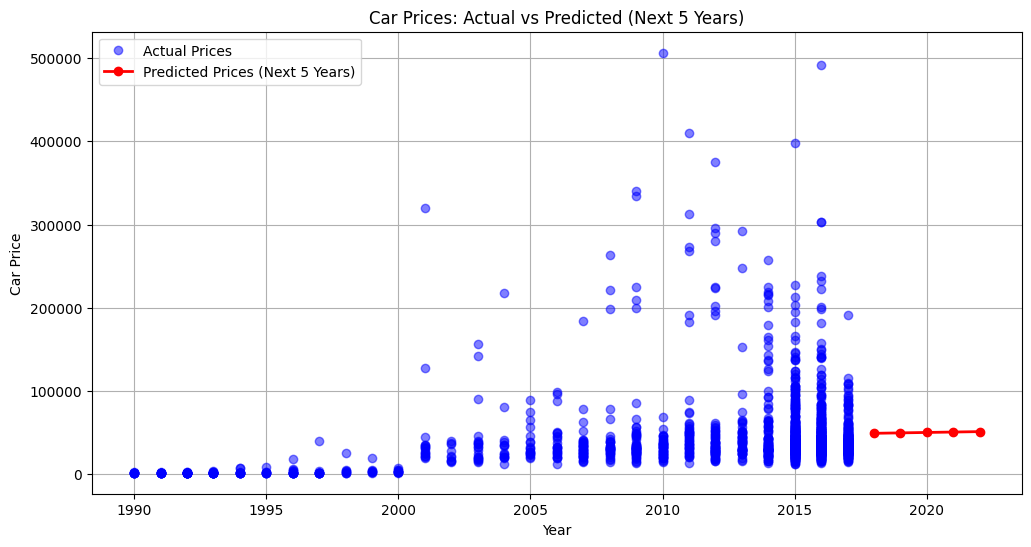

In [11]:
# Prediksi harga aktual menggunakan X_test
predicted_actual_prices = model.predict(X_test_scaled)

# Gabungkan data tahun dan harga aktual
years_actual = X_test['year']
prices_actual = y_test

# Gabungkan data tahun dan prediksi masa depan
all_years = list(years_actual) + future_years
all_prices = list(prices_actual) + future_predictions

# Visualisasi data harga aktual
plt.figure(figsize=(12, 6))
plt.plot(years_actual, prices_actual, 'bo', label='Actual Prices', alpha=0.5)

# Visualisasi data harga prediksi 5 tahun ke depan
plt.plot(future_years, future_predictions, 'r-', marker='o', label='Predicted Prices (Next 5 Years)', linewidth=2)

# Tambahkan judul dan label
plt.xlabel('Year')
plt.ylabel('Car Price')
plt.title('Car Prices: Actual vs Predicted (Next 5 Years)')
plt.legend()
plt.grid(True)
plt.show()

### Using ARIMA (AutoRegressive Integrated Moving Average)

C:\Users\mukhl\AppData\Local\Temp\ipykernel_5328\1024445952.py:11: FutureWarning: 'A' is deprecated and will be removed in a future version, please use 'YE' instead.
  data = data.resample('A').mean()  # 'A' untuk tahun
C:\Users\mukhl\AppData\Local\Temp\ipykernel_5328\1024445952.py:31: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.annotate(f'{forecast[i]:,.0f}',
C:\Users\mukhl\AppData\Local\Temp\ipykernel_5328\1024445952.py:32: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  (year, forecast[i]),


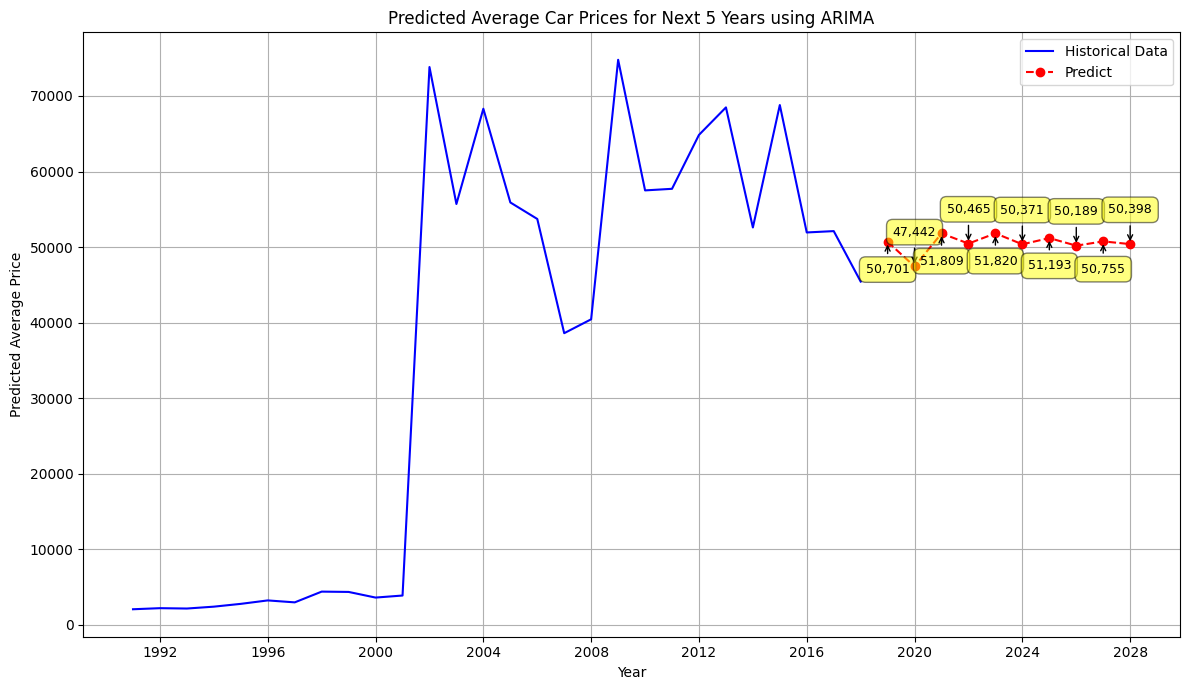

In [37]:
# Change dtype object to datetime %Y
df_cleanup['year'] = pd.to_datetime(df_cleanup['year'], format='%Y')

# Pilih data harga mobil dan urutkan berdasarkan tahun
data = df_cleanup[['year', 'price']].sort_values(by='year')

# Set 'year' sebagai indeks dan konversi ke format time series
data.set_index('year', inplace=True)

# Jika data memiliki interval waktu yang tidak konsisten, resample data
data = data.resample('A').mean()  # 'A' untuk tahun

# Fit model ARIMA
model = ARIMA(data, order=(5, 1, 0))  # Order (p, d, q) dapat disesuaikan
model_fit = model.fit()

# Buat prediksi untuk 5 tahun ke depan
forecast = model_fit.forecast(steps=10)

# Buat list tahun masa depan
future_years = [data.index[-1] + pd.DateOffset(years=i) for i in range(1, 11)]

# Visualisasikan hasil
plt.figure(figsize=(12, 7))
plt.plot(data.index, data, label='Historical Data', color='blue')
plt.plot(future_years, forecast, marker='o', linestyle='--', color='red', label='Predict')

# Tambahkan nilai pada setiap titik forecast dengan posisi berselang-seling
for i, year in enumerate(future_years):
    y_offset = (-20 if i % 2 == 0 else 20)
    plt.annotate(f'{forecast[i]:,.0f}', 
                  (year, forecast[i]), 
                  textcoords="offset points", 
                  xytext=(0, y_offset), 
                  ha='center',
                  va='center' if i % 2 == 0 else 'bottom',
                  fontsize=9,
                  bbox=dict(boxstyle='round,pad=0.5', fc='yellow', alpha=0.5),
                  arrowprops=dict(arrowstyle='->', connectionstyle='arc3,rad=0'))

plt.xlabel('Year')
plt.ylabel('Predicted Average Price')
plt.title('Predicted Average Car Prices for Next 5 Years using ARIMA')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()